# `gaslight` documentation

`gaslight` is a package for accessing and analysing grids of photoionisation models created as part of the wider **gaslight** project.

`gaslight` provides methods to access specific grid points, interpolate the grids, flatten the grids to explore large collections of models, and calculate other quantities such as equivalent widths and spectra. `gaslight` complements the much more comprehensive [`synthesizer`](https://github.com/flaresimulations/synthesizer) synthetic observations pipeline and utilises various methods and functions from that package. 

`gaslight` also makes extensive use of the [`unyt`]() package. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from gaslight.grid import Grid
from synthesizer import line_ratios

## Open a grid and get basic information

In [2]:
grid_dir = '/Users/sw376/Dropbox/Research/data/gaslight/grids'
grid_name = 'qsosed-isotropic-limited-agn-c23.01-test-v1'

g = Grid(grid_dir=grid_dir, grid_name=grid_name)

print(g)

------------------------------
SUMMARY OF GASLIGHT GRID
Grid dimensions: 
  Numer of axes: 6
  Grid shape: (5, 4, 2, 2, 2, 2)
  Numer of models: 320
  Numer of failed models: 0 (0.0%)
Grid axes: 
  mass: [1.e+06 1.e+07 1.e+08 1.e+09 1.e+10] 
  accretion_rate_eddington: [0.03162278 0.1        0.31622777 1.        ] 
  metallicity: [0.001 0.01 ] 
  ionisation_parameter: [0.01 0.1 ] 
  hydrogen_density: [1.e+04 1.e+10] 
  stop_column_density: [22. 23.] 
------------------------------



## Identifying the nearest grid point

In [3]:
point = {
    'mass': 1E8,
    'accretion_rate_eddington': 1.,
    'metallicity': 0.01, 
    'ionisation_parameter': 0.01, 
    'hydrogen_density': 1E4,
    'stop_column_density': 22}


grid_point = g.get_nearest_grid_point(point)

print(grid_point)

(2, 3, 1, 0, 0, 0)


## Obtain a line luminosity at a particular grid point

In [4]:

# line ID using the cloudy notation
line_id = 'H 1 4861.32A'

# provide a grid_point tuple
line = g.get_line(grid_point, line_id)
print(line)

# this also works if you provide the method the dictionary 
line = g.get_line(point, line_id)
print(line)


----------
SUMMARY OF H 1 4861.32A
wavelength: 4861.3 Å
log10(luminosity/erg/s): -2.21
----------
----------
SUMMARY OF H 1 4861.32A
wavelength: 4861.3 Å
log10(luminosity/erg/s): -2.21
----------


## Create LineCollection

We can also create a synthesizer LineCollection object by specifying a set of lines, or leaving the option blank to produce a collection of all available lines.

In [5]:

line_ids = [
    'H 1 4861.32A', 
    'O 3 4958.91A', 
    'O 3 5006.84A', 
    'H 1 6562.80A', 
    'N 2 6583.45A', 
    'Ni 2 6666.80A'
    ]
lines = g.get_line_collection(grid_point, line_ids=line_ids)
print(lines)

----------
LINE COLLECTION
number of lines: 6
lines: ['H 1 4861.32A' 'O 3 4958.91A' 'O 3 5006.84A' 'H 1 6562.80A'
 'N 2 6583.45A' 'Ni 2 6666.80A']
available ratios: ['BalmerDecrement', 'N2', 'R3']
available diagrams: ['BPT-NII']
----------


## Line ratios and diagrams

The LineRatio object makes it easy to extract a line ratio or line diagnostic (pair of ratios).

In [6]:
lines.get_ratio('R3')

16.15077098800685

In [7]:
lines.get_diagram('BPT-NII')

(0.05410049865746069, 16.15077098800685)

## Flatten a grid for analysis

In some contexts it might be more useful to flatten the grid. `gaslight` provides a method (`flatten`) to do this. This not only flattens the luminosity and equivalent width grids but also produces flattened versions of the axes. This allows the user to easily select ranges of parameters.

In [8]:
# create flattened grids
g.flatten()

Plot the distribution of H $\alpha$ luminosities. For AGN grids this is equivalent to the bolometric correction.

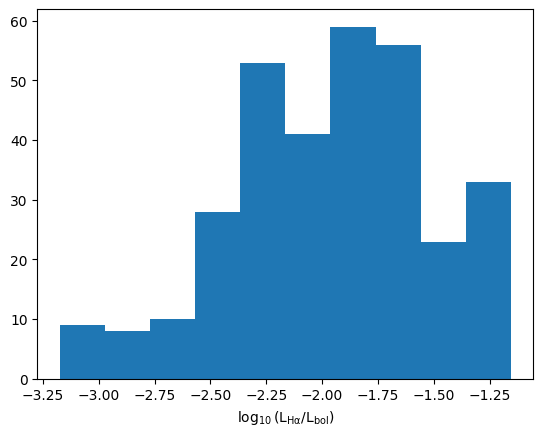

In [12]:
plt.hist(np.log10(g.luminosity_flattened['H 1 6562.80A'][~g.failed_models_flattened].to('erg/s').value))
plt.xlabel(r'$\rm \log_{10}(L_{H\alpha}/L_{bol})$')
plt.show()

## Equivalent widths

The `gaslight` grids also contain the nebular and transmitted continuum at the wavelengths of each line meaning that we can also rapidly calculate equivalent widths.

## Example library

`gaslight` is provided with a small collection of exxamples.

## Tool library

`gaslight` comes with a suite of interactive for exploring grids. 